In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from statsmodels.api import tsa
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df_03 = pd.read_excel('sales_manhattan_03.xls')
df_04 = pd.read_excel('sales_manhattan_04.xls')
df_05 = pd.read_excel('sales_manhattan_05.xls')
df_06 = pd.read_excel('sales_manhattan_06.xls')
df_07 = pd.read_excel('sales_2007_manhattan.xls')
df_08 = pd.read_excel('sales_2008_manhattan.xls')
df_09 = pd.read_excel('2009_manhattan.xls')
df_10 = pd.read_excel('2010_manhattan.xls')
df_11 = pd.read_excel('2011_manhattan.xls')
df_12= pd.read_excel('2012_manhattan.xls')
df_13 = pd.read_excel('2013_manhattan.xls')
df_14 = pd.read_excel('2014_manhattan.xls')
df_15 = pd.read_excel('2015_manhattan.xls')
df_16 = pd.read_excel('2016_manhattan.xlsx')
df_17 = pd.read_excel('2017_manhattan.xlsx')
df_18 = pd.read_excel('2018_manhattan.xlsx')
df_19 = pd.read_excel('2019_manhattan.xlsx')
df_20 = pd.read_excel('NYC_Citywide_Annualized_Calendar_Sales2020.xlsx')
df_21 = pd.read_excel('2021rollingsales_manhattan.xlsx')


In [3]:
all_df_list = [df_03, df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21]

In [4]:
df = pd.concat(all_df_list)
#df.to_csv("RealEstate_saleprice333.csv", index=False)

In [5]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CLASS AS OF FINAL ROLL,NTA,EASEMENT,BUILDING CLASS AS OF FINAL ROLL
0,1,ALPHABET CITY,02 TWO FAMILY HOMES,1,375.0,32.0,,B9,746 EAST 6 STREET,,...,3542.0,1899.0,1.0,B9,1800000,2003-01-22 00:00:00,NaN,NaN,NaN,NaN
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,372.0,31.0,,C3,316 EAST 3 STREET,,...,2700.0,1900.0,2.0,C3,0,2003-12-18 00:00:00,NaN,NaN,NaN,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,372.0,31.0,,C3,316 EAST 3 STREET,,...,2700.0,1900.0,2.0,C3,0,2003-12-18 00:00:00,NaN,NaN,NaN,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,378.0,33.0,,C4,125 AVENUE D,,...,5725.0,1910.0,2.0,C4,426000,2003-10-23 00:00:00,NaN,NaN,NaN,NaN
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,391.0,12.0,,C1,610 EAST 9 STREET,,...,11568.0,1910.0,2.0,C1,0,2003-02-28 00:00:00,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CLASS AS OF FINAL ROLL,NTA,EASEMENT,BUILDING CLASS AS OF FINAL ROLL
21442,1,WASHINGTON HEIGHTS UPPER,27 FACTORIES,4,2246.0,20.0,NaN,F2,302 DYCKMAN STREET,NaN,...,39264.0,1927.0,4.0,F2,15200000,2021-06-15 00:00:00,NaN,NaN,NaN,NaN
21443,1,WASHINGTON HEIGHTS UPPER,30 WAREHOUSES,4,2246.0,28.0,NaN,E7,290 DYCKMAN STREET,NaN,...,34570.0,1927.0,4.0,E7,20600000,2021-12-16 00:00:00,NaN,NaN,NaN,NaN
21444,1,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170.0,26.0,NaN,V1,653 WEST 187 STREET,NaN,...,0.0,NaN,4.0,V1,550000,2021-11-24 00:00:00,NaN,NaN,NaN,NaN
21445,1,WASHINGTON HEIGHTS UPPER,43 CONDO OFFICE BUILDINGS,4,2177.0,1102.0,NaN,RB,40 PINEHURST AVENUE,CFB,...,NaN,2016.0,4.0,RB,650000,2021-06-10 00:00:00,NaN,NaN,NaN,NaN
21446,1,WASHINGTON HEIGHTS UPPER,44 CONDO PARKING,4,2180.0,1224.0,NaN,RG,"736 187TH STREET, PRK24",PRK24,...,NaN,2003.0,4.0,RG,1165000,2021-08-25 00:00:00,NaN,NaN,NaN,NaN


In [7]:
df.drop(df[(df['SALE PRICE'] < 25000) | (df['SALE PRICE'] > 15000000) ].index, inplace=True)
df.dtypes

BOROUGH                             object
NEIGHBORHOOD                        object
BUILDING CLASS CATEGORY             object
TAX CLASS AT PRESENT                object
BLOCK                              float64
LOT                                float64
EASE-MENT                           object
BUILDING CLASS AT PRESENT           object
ADDRESS                             object
APARTMENT NUMBER                    object
ZIP CODE                             int64
RESIDENTIAL UNITS                  float64
COMMERCIAL UNITS                   float64
TOTAL UNITS                        float64
LAND SQUARE FEET                   float64
GROSS SQUARE FEET                  float64
YEAR BUILT                         float64
TAX CLASS AT TIME OF SALE          float64
BUILDING CLASS AT TIME OF SALE      object
SALE PRICE                           int64
SALE DATE                           object
TAX CLASS AS OF FINAL ROLL          object
NTA                                 object
EASEMENT   

In [8]:
df.rename(columns={'SALE PRICE': 'Price', 'SALE DATE': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.set_index('Date', inplace = True)

In [9]:
df['BOROUGH'] = df['BOROUGH'].replace(['MANHATTAN'],'1')

#df.sample(frac=.5)
#n = .3
#df.sample(frac=1 - n)
#df.drop(df.query('BOROUGH == 1' ).sample(frac=.8).index, inplace=True)

In [10]:
df.drop(df.columns.difference(['Price','Date']), 1, inplace=True)


C:\Users\ci106\AppData\Local\Temp/ipykernel_25184/2729280711.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['Price','Date']), 1, inplace=True)


In [11]:
#df.drop(df.query('BOROUGH == "MANHATTAN"' ).sample(frac=.5).index, inplace=True)

In [12]:
#y = df['Price']
#removed_outliers = y.between(y.quantile(.10), y.quantile(.90))
#
#df['PriceClean']=y[removed_outliers]
#
#df.tail()


In [13]:
df.sort_index(inplace=True)


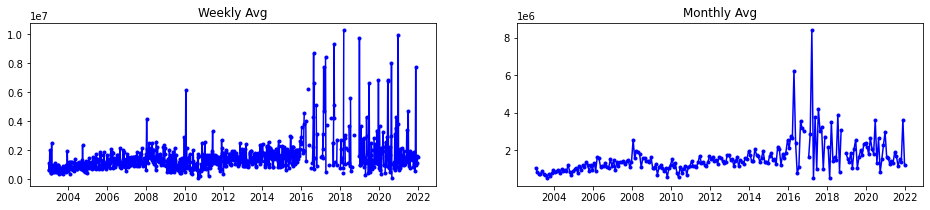

In [14]:
price_weekly_avg = df.resample('W').apply(np.mean)
price_monthly_avg = df.resample('M').apply(np.mean)
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.title('Weekly Avg')
plt.plot(price_weekly_avg.Price, "-o", markersize=3, color='blue')
plt.subplot(122)
plt.title('Monthly Avg')
plt.plot(price_monthly_avg.Price, "-o", markersize=3, color='blue')

In [15]:

df.index = pd.to_datetime(df.index)
df.resample('M').mean()
df = pd.DataFrame(df.resample('M').mean())
df.dropna(subset = ["Price"], inplace=True)

In [16]:
df.head()

,Price
Date,
2003-01-31,1.061179e+06
2003-02-28,8.572792e+05
2003-03-31,7.147892e+05
2003-04-30,7.048906e+05
2003-05-31,8.693664e+05


In [17]:
df.describe()

,Price
count,2.230000e+02
mean,1.553722e+06
std,8.755080e+05
min,4.910000e+05
25%,1.087673e+06
50%,1.370785e+06
75%,1.701387e+06
max,8.416267e+06


<AxesSubplot:xlabel='Date'>

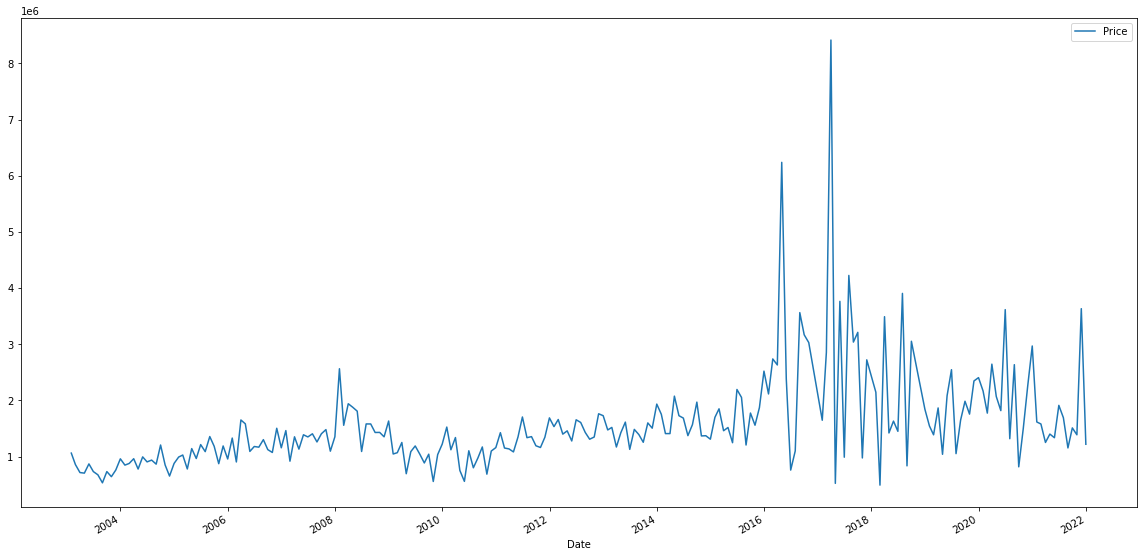

In [18]:
plt.rcParams["figure.figsize"] = [20,10]
df.plot()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
p=d=q=range(0,5)
pdq =list(itertools.product(p,d,q))

In [20]:
X = df.values
size = int(len(X) * 0.88)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [21]:
train_date=df.index[0:size]
test_date=df.index[size:len(X)]

In [22]:
AIC={}
for i in pdq:
    try:
        model_arima=ARIMA(train,order=(i))
        model_fit=model_arima.fit()
        print(model_fit.aic," ",i)
        AIC[model_fit.aic]=i
    except:
        continue

6766.697604192493   (0, 0, 0)
5922.512242250848   (0, 0, 1)
5909.981778583655   (0, 0, 2)
5911.956256131136   (0, 0, 3)
5885.368710228538   (0, 0, 4)
5977.554741955445   (0, 1, 0)
5839.794161850654   (0, 1, 1)
5832.143481698119   (0, 1, 2)
5833.307392930254   (0, 1, 3)
5842.019393463705   (0, 1, 4)
6172.864727830354   (0, 2, 0)
5962.828609274975   (0, 2, 1)
5864.059788019406   (0, 2, 2)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


5853.256309539947   (0, 2, 3)
5921.349335335298   (0, 2, 4)
6382.871136601055   (0, 3, 0)
6166.397346298589   (0, 3, 1)
6047.288363005702   (0, 3, 2)
6022.14801127946   (0, 3, 3)
6080.880720151862   (0, 3, 4)
6598.606360304289   (0, 4, 0)
6390.683183329234   (0, 4, 1)
6284.888735362271   (0, 4, 2)
6281.289178504653   (0, 4, 3)
6277.506035416762   (0, 4, 4)
5917.701966622709   (1, 0, 0)
5873.193893220781   (1, 0, 1)
5863.410761610303   (1, 0, 2)
5864.226714798535   (1, 0, 3)
5861.463013572678   (1, 0, 4)
5894.630533507328   (1, 1, 0)
5834.011976318747   (1, 1, 1)
5831.394545723174   (1, 1, 2)
5833.9600413183625   (1, 1, 3)
5831.2313506215505   (1, 1, 4)
6020.6365539613025   (1, 2, 0)
5887.113582640608   (1, 2, 1)
5821.149613013966   (1, 2, 2)
5840.030891276902   (1, 2, 3)
5848.704016000616   (1, 2, 4)
6170.450744487355   (1, 3, 0)
6007.528813344177   (1, 3, 1)
5884.9567217263375   (1, 3, 2)
5921.736998338997   (1, 3, 3)
5913.364082621706   (1, 3, 4)
6337.702660051245   (1, 4, 0)
6151.47

C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


5865.606247344724   (2, 0, 2)
5866.793425915697   (2, 0, 3)
5859.97061179618   (2, 0, 4)
5880.706451853343   (2, 1, 0)
5834.138460493239   (2, 1, 1)
5833.007822649492   (2, 1, 2)
5833.754220042084   (2, 1, 3)
5824.075677166758   (2, 1, 4)
5988.374816716423   (2, 2, 0)
5875.92298802925   (2, 2, 1)
5868.688298969448   (2, 2, 2)
5839.838238035625   (2, 2, 3)
5837.352623631657   (2, 2, 4)
6114.162489369324   (2, 3, 0)
5987.547499717557   (2, 3, 1)
6002.068685306265   (2, 3, 2)
5920.481047261121   (2, 3, 3)
5901.4628980675225   (2, 3, 4)
6251.566350558778   (2, 4, 0)
6114.318503643462   (2, 4, 1)
6147.396809609191   (2, 4, 2)
6044.033984012316   (2, 4, 3)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5987.862589379156   (2, 4, 4)
5892.874207103798   (3, 0, 0)
5868.1740365876085   (3, 0, 1)
5864.058260269367   (3, 0, 2)
5863.183743325255   (3, 0, 3)
5853.562916237188   (3, 0, 4)
5840.945498229499   (3, 1, 0)
5824.6011255813755   (3, 1, 1)
5825.379555699846   (3, 1, 2)
5820.158301434361   (3, 1, 3)
5822.815150479346   (3, 1, 4)
5938.0653566240635   (3, 2, 0)
5854.526147670365   (3, 2, 1)
5811.823486039926   (3, 2, 2)
5822.205160310281   (3, 2, 3)
5827.623502939603   (3, 2, 4)
6059.659159449808   (3, 3, 0)
5962.989296199615   (3, 3, 1)
5976.429971631931   (3, 3, 2)
5899.89735365329   (3, 3, 3)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5902.300925120269   (3, 3, 4)
6188.908173000029   (3, 4, 0)
6088.588542487538   (3, 4, 1)
5917.651911177615   (3, 4, 2)
6009.060100435834   (3, 4, 3)
6015.827840908149   (3, 4, 4)
5865.7281913522365   (4, 0, 0)
5855.02279068735   (4, 0, 1)
5856.22626077121   (4, 0, 2)
5851.307025554197   (4, 0, 3)
5849.439445063395   (4, 0, 4)
5826.523111802769   (4, 1, 0)
5825.365440576397   (4, 1, 1)
5817.580761938538   (4, 1, 2)
5819.761063426042   (4, 1, 3)
5819.62875609806   (4, 1, 4)
5894.127600292235   (4, 2, 0)
5827.888480385917   (4, 2, 1)
5811.476731103723   (4, 2, 2)
5813.504458684991   (4, 2, 3)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5809.260402766969   (4, 2, 4)
6007.552925496062   (4, 3, 0)
5915.892467009027   (4, 3, 1)
5815.191067002186   (4, 3, 2)
5859.299583670934   (4, 3, 3)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5856.186798613704   (4, 3, 4)
6132.462166851976   (4, 4, 0)
6035.075711716416   (4, 4, 1)
5881.775645016061   (4, 4, 2)
5953.791244088472   (4, 4, 3)
5930.269907198024   (4, 4, 4)


C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
AIC[min(AIC.keys())] 

(4, 2, 4)

In [44]:
model_arima=ARIMA(train,order=(4,2,4))
model_fit=model_arima.fit()

C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ci106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  196
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -2895.630
Date:                Sat, 29 Jan 2022   AIC                           5809.260
Time:                        15:59:26   BIC                           5838.671
Sample:                             0   HQIC                          5821.170
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8371      0.166    -11.044      0.000      -2.163      -1.511
ar.L2         -1.2493      0.233     -5.361      0.000      -1.706      -0.793
ar.L3         -0.6915      0.260     -2.659      0.008      -1.201      -0.182
ar.L4         -0.3516      0.132     -2.655      0.008      -0.611      -0.092
ma.L1         -0.1008      0.176     -0.573      0.567      -0.446       0.244
ma.L2         -1.3697      0.196     -6.983      0.000      -1.754      -0.985
ma.L3          0.0371      0.184      0.201      0.840      -0.324       0.398
ma.L4          0.4424      0.194      2.285      0.022       0.063       0.822
sigma2      7.354e+11   1.85e-12   3.99e+23      0.000    7.35e+11    7.35e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              4498.54
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              15.46   Skew:                             2.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+38. Standard errors may be unstable.
"""

                  0
count  1.960000e+02
mean  -4.496189e+04
std    7.005886e+05
min   -2.202882e+06
25%   -2.721795e+05
50%   -4.587732e+04
75%    1.929599e+05
max    5.252988e+06


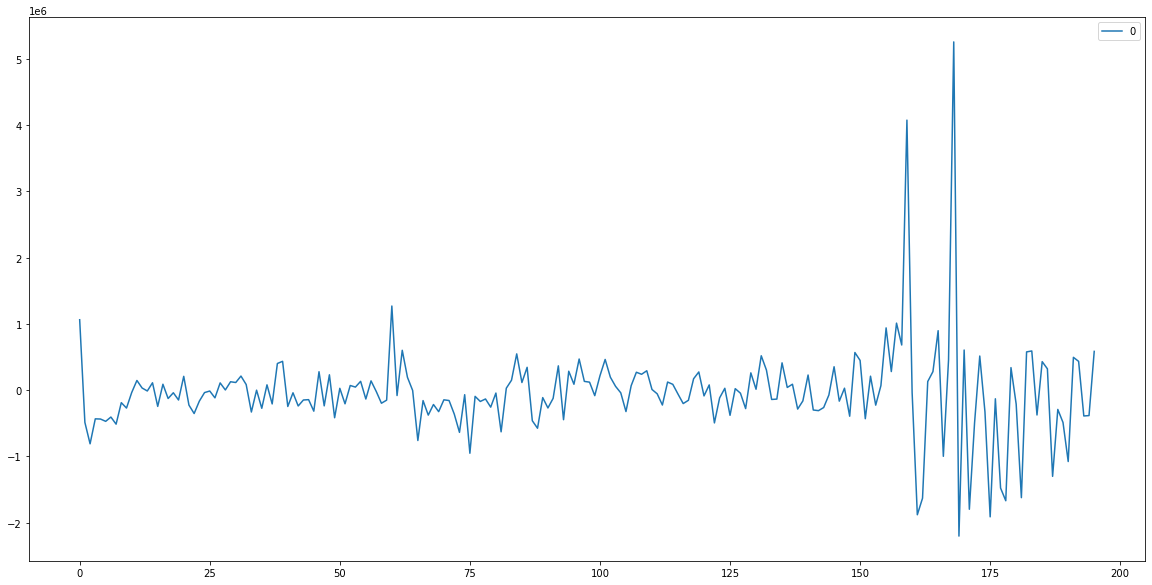

In [46]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
print(residuals.describe())

In [62]:
predictions=[]
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

predicted=1906316.842160, expected=1755615.565217
predicted=1597422.967536, expected=2345950.666667
predicted=2227654.361120, expected=2405272.000000
predicted=2304908.498454, expected=2168436.388889
predicted=1805899.232446, expected=1773332.692308
predicted=2122595.452815, expected=2645200.200000
predicted=2210884.001477, expected=2069375.000000
predicted=2317258.670038, expected=1817800.111111
predicted=2056669.839872, expected=3616027.875000
predicted=2113357.845401, expected=1317735.428571
predicted=2603223.086991, expected=2636098.000000
predicted=1964844.540330, expected=817000.000000
predicted=2590151.657817, expected=1502883.111111
predicted=2056762.243109, expected=2254700.000000
predicted=1750033.245305, expected=2968636.363636
predicted=1815618.774380, expected=1615498.928571
predicted=1718486.551471, expected=1580045.833333
predicted=1931622.704880, expected=1250875.350000
predicted=2267708.135207, expected=1400162.290323
predicted=1947493.793986, expected=1335074.161290
p

Test RMSE: 725806.052


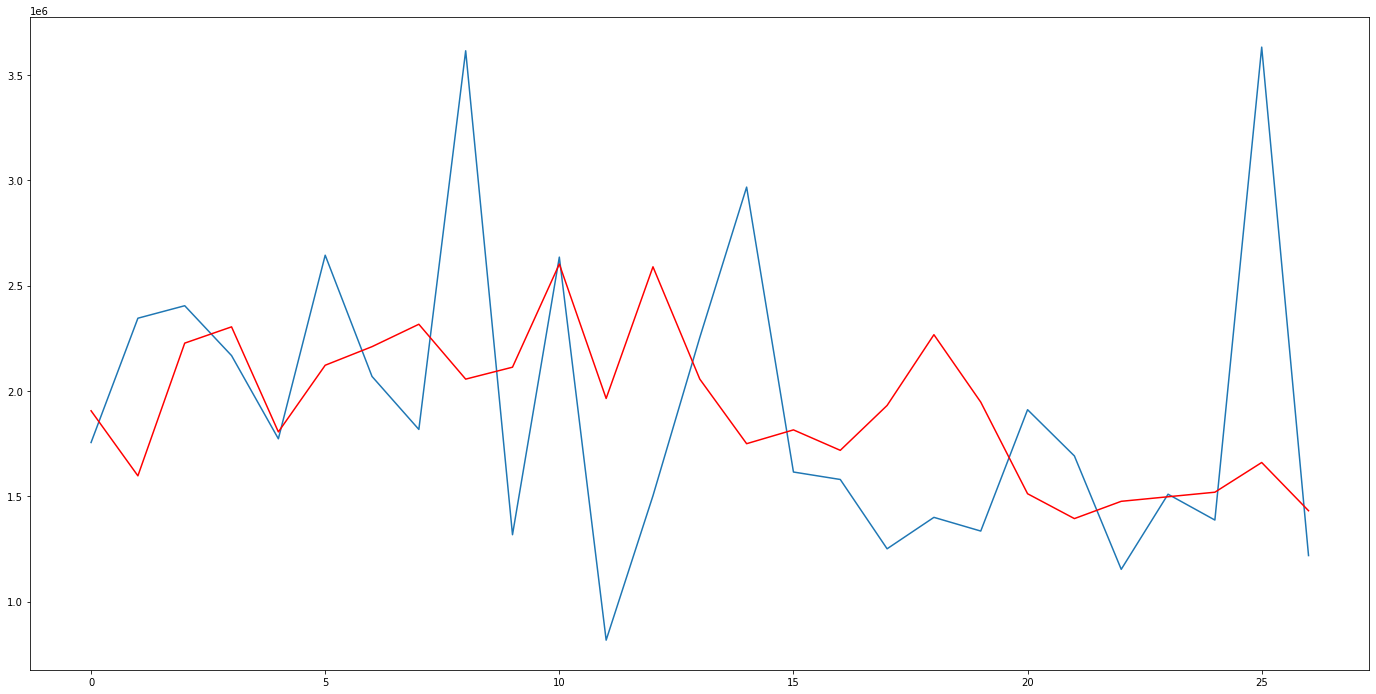

In [63]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(24,12))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Text(0, 0.5, 'Autocorrelation')

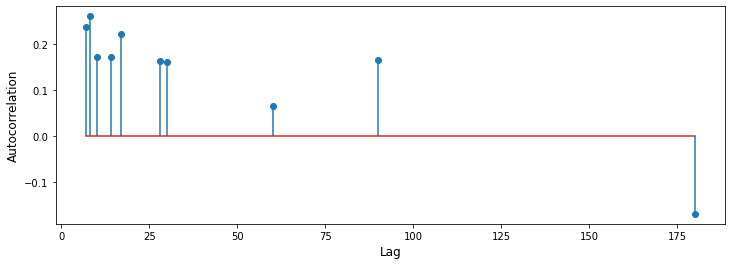

In [59]:
lags = [7, 8, 10, 14, 17, 28, 30, 60, 90, 180] 
autocorrs = [df.Price.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

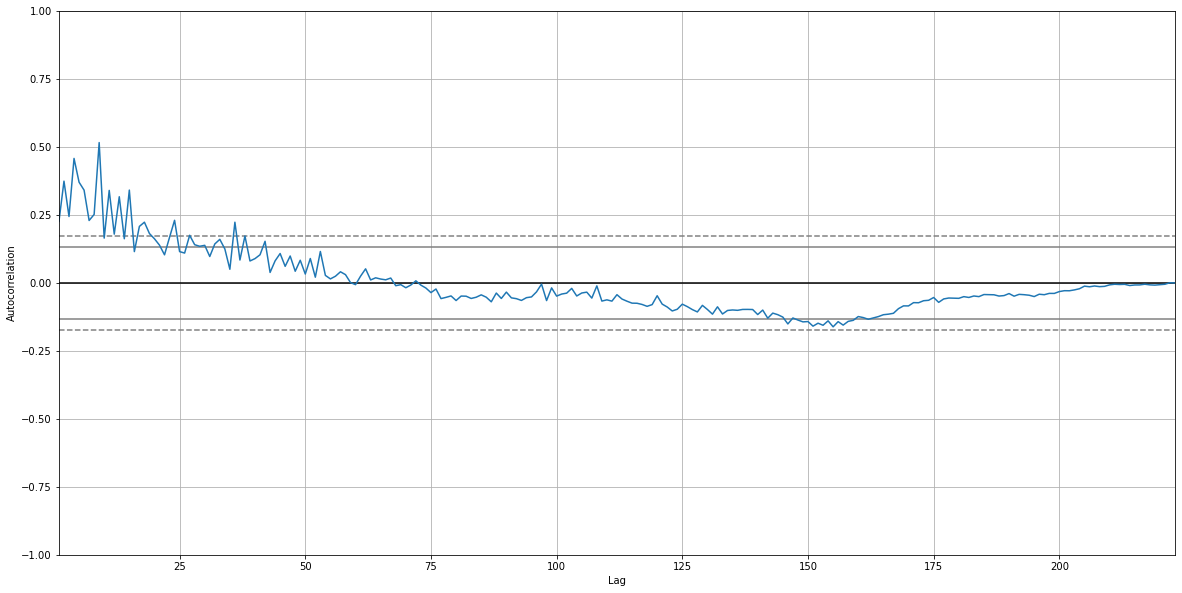

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df) 


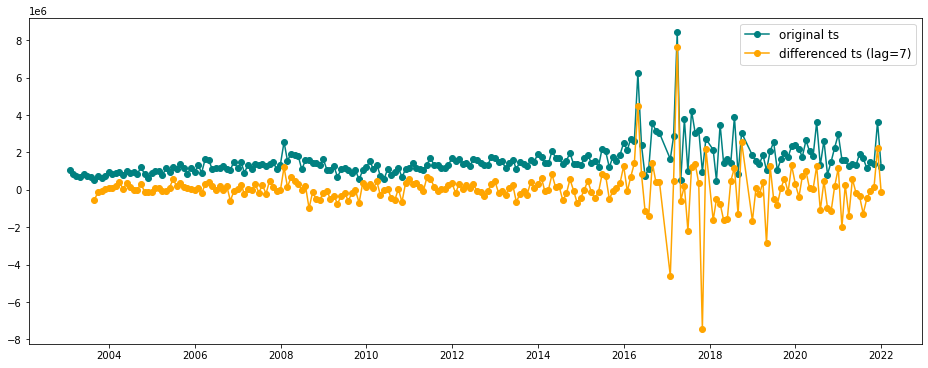

In [28]:
plt.figure(figsize=(16, 6))
plt.plot(df.Price, '-o', color='teal', label="original ts")
plt.plot(df.Price.diff(7), '-o', color='orange', label="differenced ts (lag=7)")
plt.legend(fontsize=12)

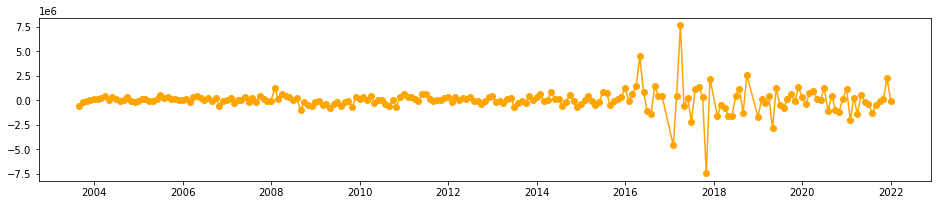

In [29]:
prices = df.Price
price_diff = prices.diff(7).dropna() 

plt.figure(figsize=(16,3))
plt.plot(price_diff, "-o", color='orange')

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
test_result=adfuller(df['Price'])

In [32]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [33]:
adfuller_test(df['Price'])

ADF Test Statistic : -2.1155513817540106
p-value : 0.23830746620588072
#Lags Used : 9
Number of Observations Used : 213
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [34]:
df['Price First Difference'] = df['Price'] - df['Price'].shift(1)

In [35]:
df['Price'].shift(1)

Date
2003-01-31             NaN
2003-02-28    1.061179e+06
2003-03-31    8.572792e+05
2003-04-30    7.147892e+05
2003-05-31    7.048906e+05
                  ...     
2021-08-31    1.691842e+06
2021-09-30    1.153337e+06
2021-10-31    1.510091e+06
2021-11-30    1.387379e+06
2021-12-31    3.633401e+06
Name: Price, Length: 223, dtype: float64

In [36]:
df['Seasonal First Difference']=df['Price']-df['Price'].shift(12)

In [37]:
df.head(20)

,Price,Price First Difference,Seasonal First Difference
Date,,,
2003-01-31,1.061179e+06,NaN,NaN
2003-02-28,8.572792e+05,-203899.742424,NaN
2003-03-31,7.147892e+05,-142490.015152,NaN
2003-04-30,7.048906e+05,-9898.575758,NaN
2003-05-31,8.693664e+05,164475.775594,NaN
2003-06-30,7.324581e+05,-136908.290745,NaN
2003-07-31,6.749770e+05,-57481.078463,NaN
2003-08-31,5.319889e+05,-142988.084184,NaN
2003-09-30,7.321784e+05,200189.506296,NaN


In [38]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.964536907438893
p-value : 2.607361240394443e-05
#Lags Used : 12
Number of Observations Used : 198
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

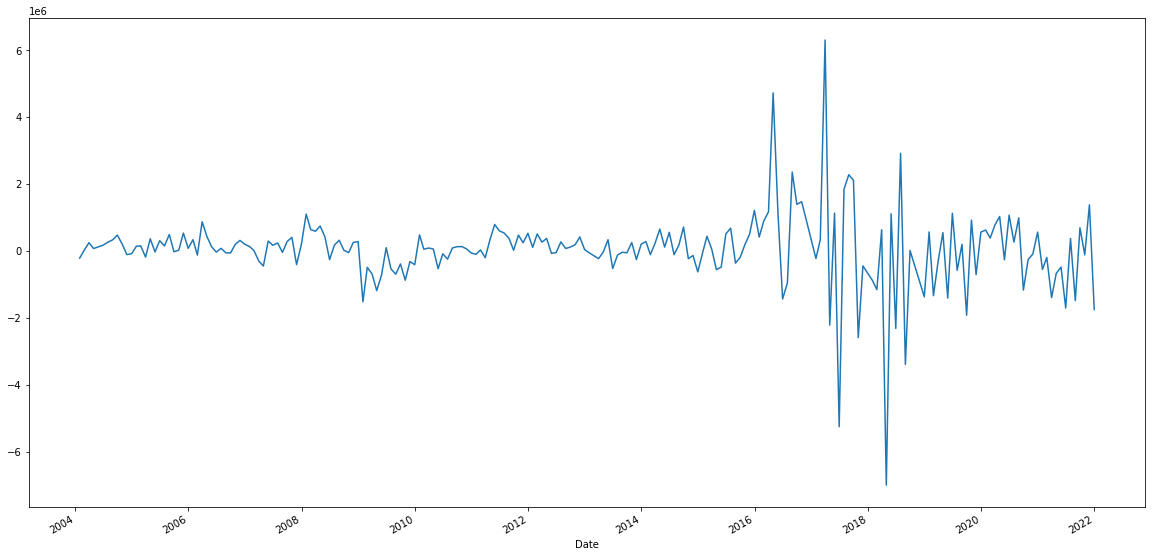

In [39]:
df['Seasonal First Difference'].plot()

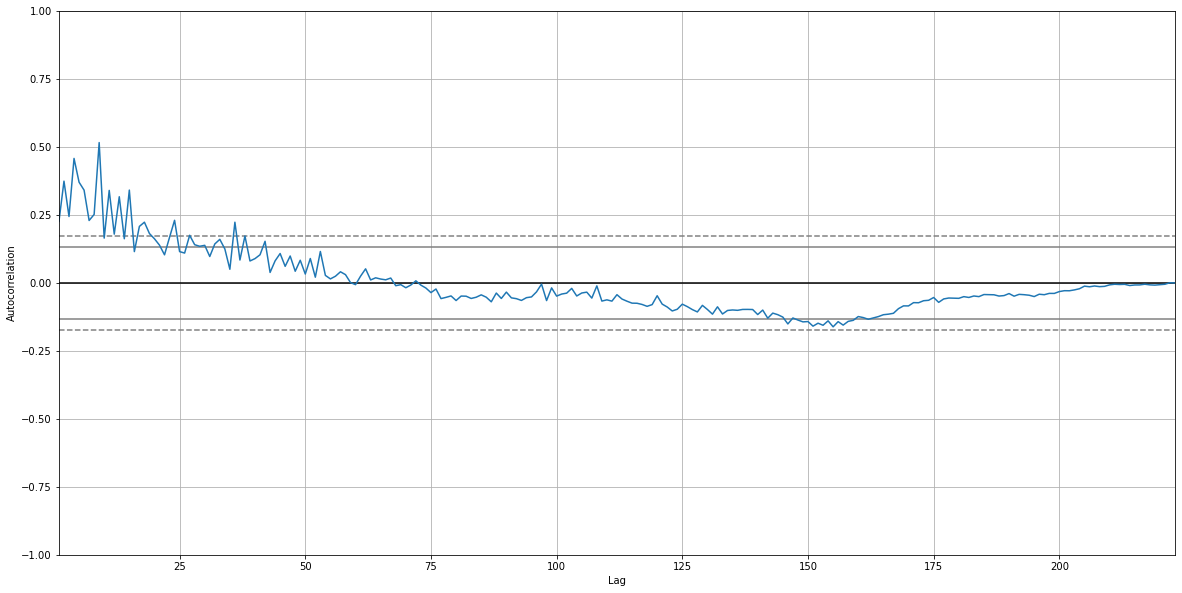

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])
plt.ylim([-1, 1])
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

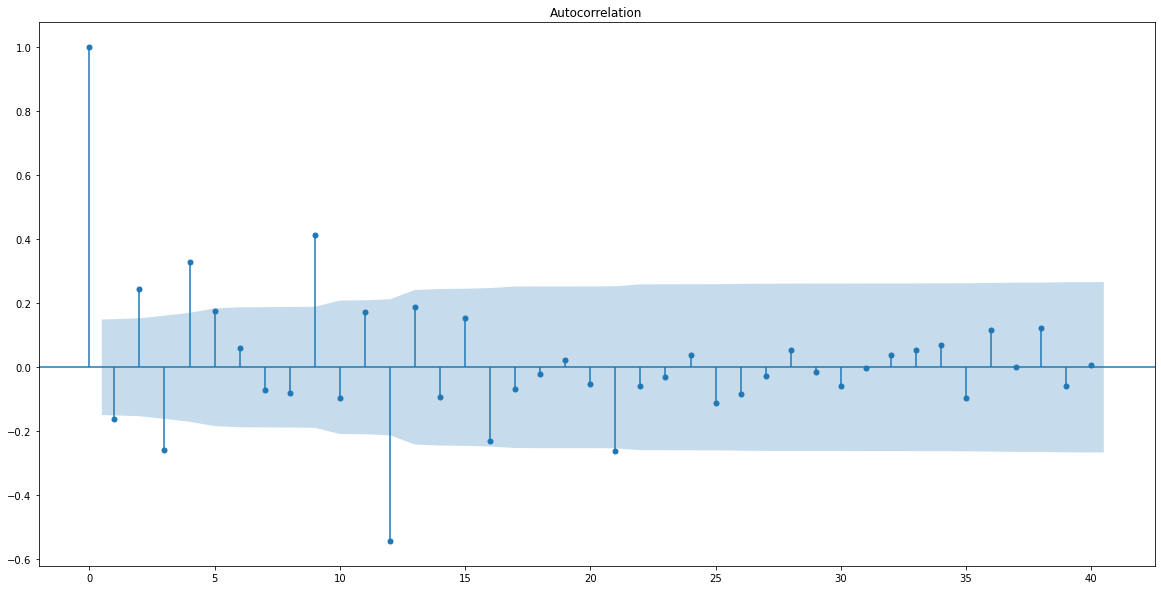

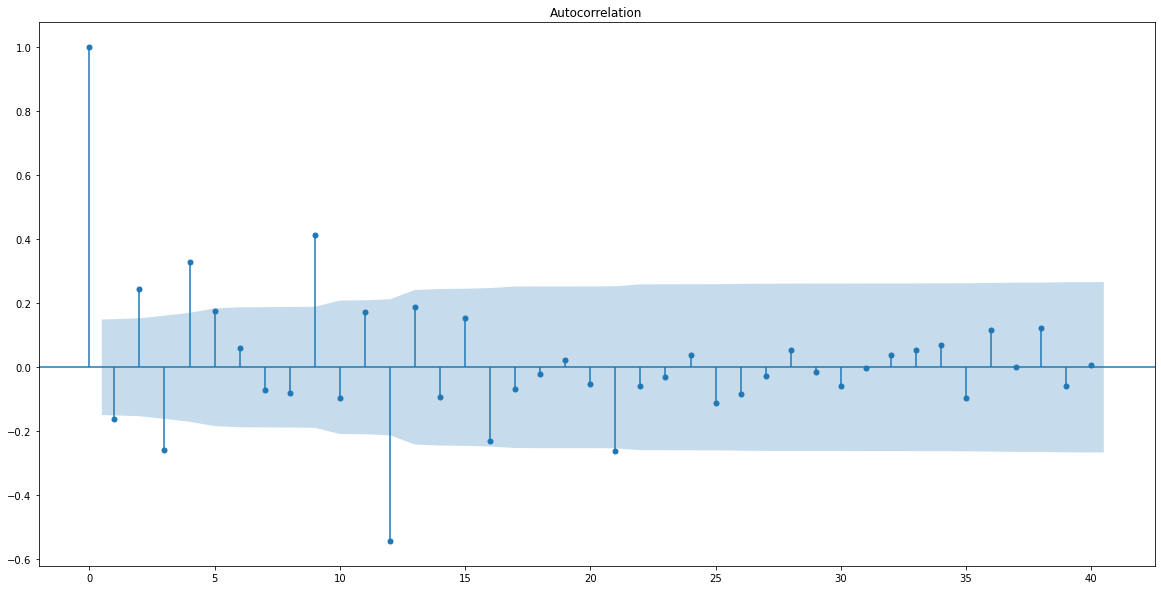

In [42]:
plot_acf(df['Seasonal First Difference'].iloc[50:],lags=40)

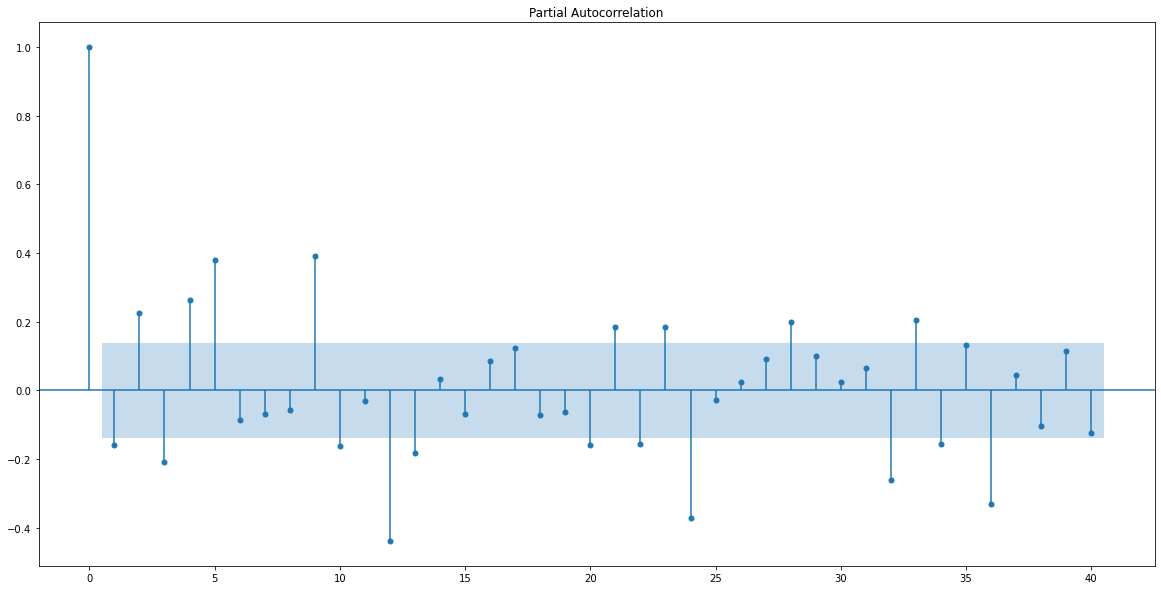

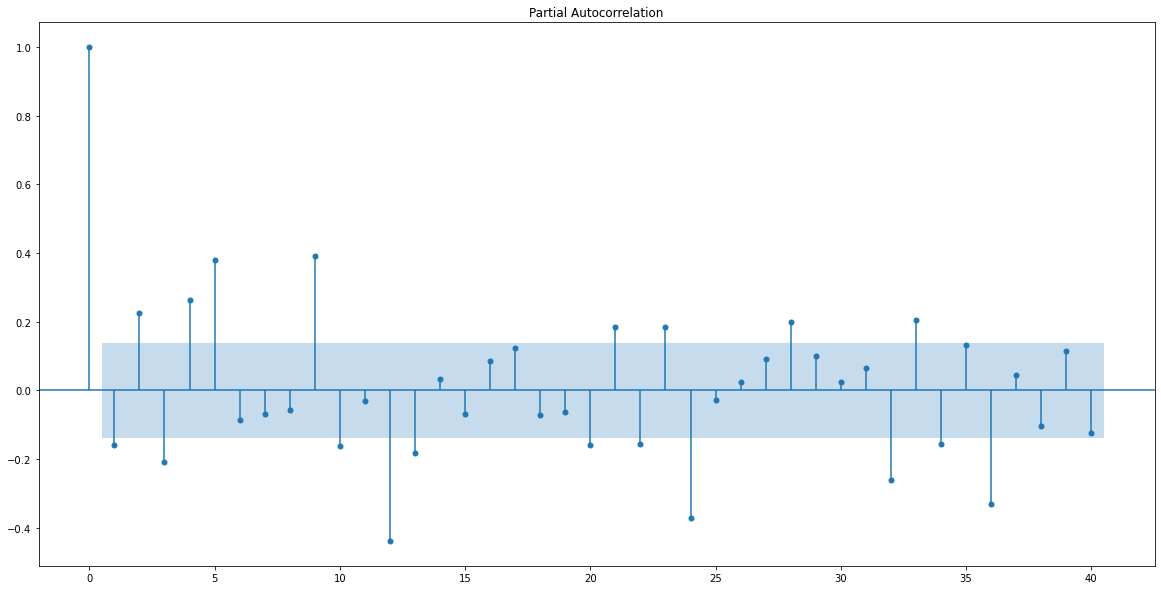

In [43]:
plot_pacf(df['Seasonal First Difference'].iloc[23:],lags=40)